In [1]:
# Install needed packages
!pip install imbalanced-learn

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv("dataset_med.csv")
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [4]:
df.shape

(890000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [6]:
df.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [7]:
df.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')

In [8]:
numeric_features=df.select_dtypes(include=['int64','float']).columns.tolist()
numeric_features

['id',
 'age',
 'bmi',
 'cholesterol_level',
 'hypertension',
 'asthma',
 'cirrhosis',
 'other_cancer',
 'survived']

In [9]:
categorical_features=df.select_dtypes(include=['object']).columns.tolist()
categorical_features

['gender',
 'country',
 'diagnosis_date',
 'cancer_stage',
 'family_history',
 'smoking_status',
 'treatment_type',
 'end_treatment_date']

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoders={}
for col in categorical_features:
    label_encoders[col]=LabelEncoder()
    df[col]=label_encoders[col].fit_transform(df[col])

In [11]:
df.head(2)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,1,26,673,0,1,3,29.4,199,0,0,1,0,0,1011,0
1,2,50.0,0,19,3244,2,1,3,41.2,280,1,1,0,0,3,3483,1


In [12]:
# splitting the dataset into features and target variables
x=df.drop('survived',axis=1)
y=df['survived']

survived
0    693996
1    196004
Name: count, dtype: int64


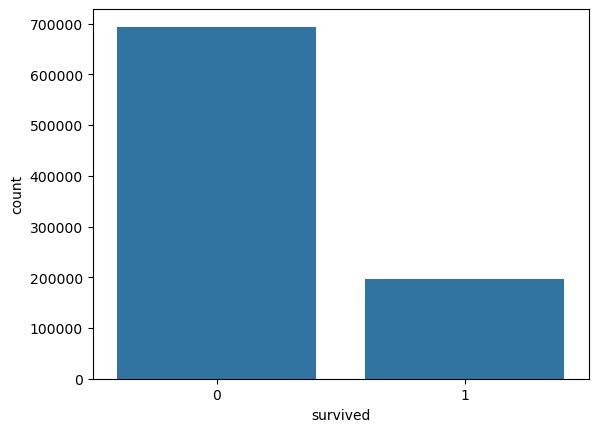

In [13]:
# checking if the target feature is balanced and the plotting
print(y.value_counts())
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='survived',data=df)
plt.show()

In [14]:
# train the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42,stratify=y)

In [15]:
from imblearn.over_sampling import SMOTE
'''set the random state, it ensures that the synthetic data generated during the oversampling process is the same every time you run the code'''
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [16]:
x_train_res.shape

(929954, 16)

In [17]:
y_train_res.shape

(929954,)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [19]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train_res, y_train_res)

RandomForestClassifier(random_state=0)

In [20]:
y_pred_rf = rf.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.6744092611508342


In [21]:
print("Report:\n", classification_report(y_test, y_pred_rf))

Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80    229019
           1       0.22      0.19      0.20     64681

    accuracy                           0.67    293700
   macro avg       0.50      0.50      0.50    293700
weighted avg       0.66      0.67      0.66    293700



In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
base_model1=DecisionTreeClassifier()
bagging = BaggingClassifier(estimator=base_model1, n_estimators=200, random_state=0)
bagging.fit(x_train_res, y_train_res)

In [ ]:
y_pred_bagging = bagging.predict(x_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))